# Sentiment Analysis on Twitter Data using PySpark

In [ ]:
%%bash

# Need to install pyspark
# if pyspark is already installed, will print a message indicating pyspark already isntalled
pip install pyspark

# Download tweets.csv from github
# If the tweets.csv file does not exist in the colab environment
if [[ ! -f ./tweets.csv ]]; then 
   # download tweets.csv file from github and save it in this colab environment instance
   wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/tweets.csv   
fi

# vefify tweets.csv exits in the colab env - should not print an error message
ls tweets.csv

  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=06548415a922bbe02a871b2658afbdb1a7b8b5b8bd6bbd83f57be7858dc21d00
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark
tweets.csv


--2020-11-15 17:01:21--  https://raw.githubusercontent.com/wewilli1/ist718_data/master/tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13727793 (13M) [text/plain]
Saving to: ‘tweets.csv’

     0K .......... .......... .......... .......... ..........  0% 4.85M 3s
    50K .......... .......... .......... .......... ..........  0% 4.79M 3s
   100K .......... .......... .......... .......... ..........  1% 24.1M 2s
   150K .......... .......... .......... .......... ..........  1% 22.0M 2s
   200K .......... .......... .......... .......... ..........  1% 7.12M 2s
   250K .......... .......... .......... .......... ..........  2% 55.3M 1s
   300K .......... .......... .......... .......... ..........  2% 43.4M 1s
   350K .......... .......... .......... .

In [ ]:
# import statements
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [ ]:
# example code to read the downloaded tweets.csv file on colab
tweets_df = spark.read.format("csv").option("header", "true").load("tweets.csv")
tweets_df.take(5)

[Row(target='4', id='1467822272', date='Mon Apr 06 22:22:45 PDT 2009', flag='NO_QUERY', user='ersle', text='I LOVE @Health4UandPets u guys r the best!! '),
 Row(target='4', id='1467822273', date='Mon Apr 06 22:22:45 PDT 2009', flag='NO_QUERY', user='becca210', text='im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!'),
 Row(target='4', id='1467822283', date='Mon Apr 06 22:22:46 PDT 2009', flag='NO_QUERY', user='Wingman29', text='@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. '),
 Row(target='4', id='1467822287', date='Mon Apr 06 22:22:46 PDT 2009', flag='NO_QUERY', user='katarinka', text='Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup'),
 Row(target='4', id='1467822293', date='Mon Apr 06 22:22:46 PDT 2009', flag='NO_QUERY', user='_EmilyYoung', text='@LovesBrooklyn2 he has that effect on everyone ')]

In [ ]:
# Do not delete or change this cell

enable_grid = True

# grading import statements
%matplotlib inline
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

# Define a function to determine if we are running on data bricks
# Return true if running in the data bricks environment, false otherwise
def is_databricks():
    # get the databricks runtime version
    db_env = os.getenv("DATABRICKS_RUNTIME_VERSION")
    
    # if running on data bricks
    if db_env != None:
        return True
    else:
        return False

# Define a function to read the data file.  The full path data file name is constructed
# by checking runtime environment variables to determine if the runtime environment is 
# databricks, or a student's personal computer.  The full path file name is then
# constructed based on the runtime env.
# 
# Params
#   data_file_name: The base name of the data file to load
# 
# Returns the full path file name based on the runtime env
#
# Correct Usage Example (pass ONLY the full file name):
#   file_name_to_load = get_training_filename("sms_spam.csv") # correct - pass ONLY the full file name  
#   
# Incorrect Usage Example
#   file_name_to_load = get_training_filename("/sms_spam.csv") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("sms_spam.csv/") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("c:/users/will/data/sms_spam.csv") incorrect -pass ONLY the full file name
def get_training_filename(data_file_name):    
    # if running on data bricks
    if is_databricks():
        # build the full path file name assuming data brick env
        full_path_name = "dbfs:/FileStore/tables/%s" % data_file_name
    # else the data is assumed to be in the same dir as this notebook
    else:
        # Assume the student is running on their own computer and load the data
        # file from the same dir as this notebook
        full_path_name = data_file_name
    
    # return the full path file name to the caller
    return full_path_name

# Sentiment Analysis
In this assignment, you will use the tweets.csv file to perform sentiment analysis. The tweets.csv file contains the following columns:
- target: the polarity of the tweet (0 = negative, 4 = positive)
- ids: The id of the tweet ( 2087)
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- flag: The query (lyx). If there is no query, then this value is NO_QUERY.
- user: the user that tweeted (robotickilldozr)
- text: the text of the tweet (Lyx is cool)

# Reading in our Twitter Data
Read tweets.csv into a spark dataframe named `tweets_df`.  Solutions that do not use `get_training_filename` will be heavily penalized.  Drop all columns except target and text.  Transform the target column such that a negative sentiment is equal to 0 and a positive sentiment is equal to 1.  Determine and print the percentage of positive and negative tweets in the dataframe such that it's easy for the graders to find and interpret your data.

In [ ]:
# your code here
# import statements
from pyspark.sql import functions as F

from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
#read the downloaded tweets.csv file on colab
tweets_df = spark.read.format("csv").option("header", "true").load("tweets.csv")
#tweets_df.take(5)
#dropping unnecessary columns
tweets_df = tweets_df.drop('id','date','flag','user')
#finding the min and max values of our target column
min1, max1 = tweets_df.select(F.min("target"), F.max("target")).first()
#casting our max and min values to 1 and 0 to represent positive and negatively labeled tweets, respectively
target_1 = (F.when(F.col("target") == max1, 1)    
    .when(F.col("target") == min1, 0)   
    .otherwise(None))    
#placing in our new column               
tweets_df = tweets_df.withColumn("target_1", target_1)
#dropping the old
tweets_df = tweets_df.drop('target')
#renaming our updated target column
tweets_df = tweets_df.withColumnRenamed('target_1','target')
#tweets_df.take(5)

In [ ]:
from pyspark.sql.types import IntegerType
pos = tweets_df.agg(F.sum("target")).collect()[0][0]
length = tweets_df.count()
neg = pos - 1
print(" percentage of positively labeled tweets: ",100*(pos/length),'%\n',"percent negatively labeled tweets",round(100*(neg/length),0),'%')

 percentage of positively labeled tweets:  50.0 %
 percent negatively labeled tweets 50.0 %


In [ ]:
# grading cell do not modify
tweets_pd = tweets_df.toPandas()
display(tweets_pd.head())
print(tweets_pd.shape)

,text,target
0,I LOVE @Health4UandPets u guys r the best!!,1
1,im meeting up with one of my besties tonight! ...,1
2,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
3,Being sick can be really cheap when it hurts t...,1
4,@LovesBrooklyn2 he has that effect on everyone,1


(100000, 2)


# Data Pre-Processing and Vectorization
Pre-process the data by creating a pipeline named `tweets_pre_proc_pipe`. Your pipeline should tokenize, remove stop words, and do a TF-IDF transformation.  Fit and execute your pipeline, and create a new dataframe named `tweets_pre_proc_df`.  Print the shape of the resulting TF-IDF data such that it's easy for the graders to find and understand as num rows x num words. Based on the shape of the TF-IDF data, would you expect a logistic regression model to overfit?

In [ ]:
# your code here
#tokenize
from pyspark.ml.feature import Tokenizer
from pyspark.ml.feature import RegexTokenizer

tokenizer = RegexTokenizer().setInputCol('text').setOutputCol('words').setGaps(False).setPattern("\\p{L}+")
#tokenizer.transform(documents_df).show()
from pyspark.ml.feature import StopWordsRemover
import nltk
# we obtain the stop words from a website
import requests
stop_words = requests.get('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words').text.split()
#removing stopwords
from pyspark.ml.feature import StopWordsRemover
sw_filter = StopWordsRemover()\
  .setStopWords(stop_words)\
  .setCaseSensitive(False)\
  .setInputCol("words")\
  .setOutputCol("filtered")
from pyspark.ml.feature import CountVectorizer, IDF
#remove words that appear in 5 docs or less along with our idf object
#cv = CountVectorizer().setInputCol("filtered").setOutputCol("tf") 

# we will remove words that appear in 5 docs or less
cv = CountVectorizer()\
  .setInputCol("filtered")\
  .setOutputCol("tf")
#minTF=1., minDF=5., vocabSize=2**17
idf = IDF().setInputCol('tf').setOutputCol('tfidf')
#building pipeline
from pyspark.ml import Pipeline
pre_pipe = Pipeline(stages=[tokenizer, sw_filter, cv]).fit(tweets_df)
tweets_pre_proc_pipe = Pipeline(stages=[pre_pipe,idf]).fit(tweets_df)

In [ ]:
 #fit transform on our data set
tweets_pre_proc_df = tweets_pre_proc_pipe.transform(tweets_df)
TFIDF = tweets_pre_proc_df.select('tfidf','tf')
#TF = tweets_pre_proc_df
print("Shape of TF-IDF data\nNumber of rows:", TFIDF.count(), "\nNumber of words: ",TFIDF.collect()[0][0].size)#TFIDF.collect([0][0]).size())# "num of words: ", tweets_pre_proc_df.select('id').)

Shape of TF-IDF data
Number of rows: 100000 
Number of words:  82504


In [ ]:
# grading cell do not modify
display(tweets_pre_proc_df.toPandas().head())

,text,target,words,filtered,tf,tfidf
0,I LOVE @Health4UandPets u guys r the best!!,1,"[i, love, health, uandpets, u, guys, r, the, b...","[love, health, uandpets, u, guys, r, best]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,im meeting up with one of my besties tonight! ...,1,"[im, meeting, up, with, one, of, my, besties, ...","[im, meeting, besties, tonight, wait, girl, talk]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"@DaRealSunisaKim Thanks for the Twitter add, S...",1,"[darealsunisakim, thanks, for, the, twitter, a...","[darealsunisakim, thanks, twitter, add, sunisa...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Being sick can be really cheap when it hurts t...,1,"[being, sick, can, be, really, cheap, when, it...","[sick, really, cheap, hurts, eat, real, food, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,@LovesBrooklyn2 he has that effect on everyone,1,"[lovesbrooklyn, he, has, that, effect, on, eve...","[lovesbrooklyn, effect]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Your explanation here: This definitely runs the chance of overfitting given the large number of words and overall variance in tweets generally. High variance data usually reults in overfit LR models because decision boundaries will have large descrepencies for small changes in data. Due to this, an overfit model Logistic Regression model tends to have too many features derived from the corpus and the opposite is normally true for an underfit model. 

# Performing Inference on most and least important words for predicting sentiment using Inverse Document Frequency
Since IDF considers a word's frequency across all documents in a corpus, you can use IDF as a form of inference.  Examine the documentation for the spark ML object that you used to create TF-IDF scores and learn how to extract the IDF scores for words in the corpus.  Create a pandas dataframe containing the 5 most important IDF scores named `most_imp_idf`.  Create another pandas dataframe containing the 5 least important IDF scores named `least_imp_idf`.  Each dataframe shall have 2 columns named `word` and `idf_score`.  Explain in words your interpretation of what the IDF scores mean.

In [ ]:
tweets_pre_proc_df.show(5)

+--------------------+------+--------------------+--------------------+--------------------+--------------------+
|                text|target|               words|            filtered|                  tf|               tfidf|
+--------------------+------+--------------------+--------------------+--------------------+--------------------+
|I LOVE @Health4Ua...|     1|[i, love, health,...|[love, health, ua...|(82504,[14,21,87,...|(82504,[14,21,87,...|
|im meeting up wit...|     1|[im, meeting, up,...|[im, meeting, bes...|(82504,[20,58,66,...|(82504,[20,58,66,...|
|@DaRealSunisaKim ...|     1|[darealsunisakim,...|[darealsunisakim,...|(82504,[12,25,29,...|(82504,[12,25,29,...|
|Being sick can be...|     1|[being, sick, can...|[sick, really, ch...|(82504,[18,56,80,...|(82504,[18,56,80,...|
|@LovesBrooklyn2 h...|     1|[lovesbrooklyn, h...|[lovesbrooklyn, e...|(82504,[2089,2456...|(82504,[2089,2456...|
+--------------------+------+--------------------+--------------------+-----------------

In [ ]:
from pyspark.sql.functions import explode
#first, we subset our dataframe to only contain the list of filtered documents 
tweets_filtered = tweets_pre_proc_df.select('filtered')
#Following this we use unique identifiers for all documents in our corpus. using the monotonically_increasing_id pyspark sql functionality
tweets = tweets_filtered.withColumn('index',F.monotonically_increasing_id())
#To count terms in each tweets or document we extract each token our word from our documents. 
#therefore we will have each token or term indexed by which document it belongs too.
#this is the equivalent of unfolding each document or tidying it up like we've seen in hw's 1 and 2
df = tweets.select('index','filtered',explode(tweets.filtered).alias("term"))
#as we can see the explode function explodes each array of terms so that each word will belong to a a separate row.
#following this we can calculate term frequencies for each documnent
df.show()
# tweets.show()
#filtered, id, explode(filtered).alias('words')

+-----+--------------------+---------------+
|index|            filtered|           term|
+-----+--------------------+---------------+
|    0|[love, health, ua...|           love|
|    0|[love, health, ua...|         health|
|    0|[love, health, ua...|       uandpets|
|    0|[love, health, ua...|              u|
|    0|[love, health, ua...|           guys|
|    0|[love, health, ua...|              r|
|    0|[love, health, ua...|           best|
|    1|[im, meeting, bes...|             im|
|    1|[im, meeting, bes...|        meeting|
|    1|[im, meeting, bes...|        besties|
|    1|[im, meeting, bes...|        tonight|
|    1|[im, meeting, bes...|           wait|
|    1|[im, meeting, bes...|           girl|
|    1|[im, meeting, bes...|           talk|
|    2|[darealsunisakim,...|darealsunisakim|
|    2|[darealsunisakim,...|         thanks|
|    2|[darealsunisakim,...|        twitter|
|    2|[darealsunisakim,...|            add|
|    2|[darealsunisakim,...|         sunisa|
|    2|[da

In [ ]:
from pyspark.sql.functions import count

df = df.groupBy('index','term').agg(count('filtered').alias('tf')) 
#for example, the term "finished" occurs once in the 85th document assuming our index is starting from 0 
#Now we can obtain document frequency
df.show()

+-----+-------------+---+
|index|         term| tf|
+-----+-------------+---+
|   71|      leiabox|  1|
|   86|     finished|  1|
|   88|          san|  2|
|  127|       mirror|  1|
|  174|        agree|  1|
|  215|         bike|  1|
|  222|        right|  1|
|  224|         club|  1|
|  244|         like|  1|
|  261|            s|  1|
|  308|         iowa|  1|
|  308|         come|  1|
|  317|espressowoman|  1|
|  333|        great|  1|
|  359|  neverwinter|  1|
|  424|         hoow|  1|
|  442|      exactly|  1|
|  458|        watch|  1|
|  469|        point|  1|
|  505|         drum|  1|
+-----+-------------+---+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import countDistinct
#DF of a word is the # of documents containing this word 
#We count documents containingeach term in our exploded df 
#countDistinct to count distinct documents for each term.
df_df = df.groupby('term').agg(countDistinct('index').alias('df'))
df_df.show(5)

+--------+----+
|    term|  df|
+--------+----+
|    hope|2102|
|everyday|  72|
|    lfta|  10|
|     art| 119|
|   monte|   6|
+--------+----+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import log10
#Inverse Document frequency will allow us to suppress the weight associated with extremely common words 
#Even those these terms are expected to have a high TF throughout our corpus they might not do not convey information that's completely relevamt to our document
#IDF is essentially an effective noide-reduction technique we can use for certain terms 
from pyspark.sql.functions import col
idf = df_df.withColumn("df",df_df['df'].cast('int'))
#We know that log 10 (100000) or N of our data points is equivalent to 5
#avoid type error by converting our df column to an integer type so this calculation is compatible
idf = idf.withColumn('idf', (1+(5/log10(col('df')))))
idf_imp = idf.sort('idf')
#idf = df_df.join(idf, on=['df'], how='full')

In [ ]:
distinctDF = idf.distinct()

In [ ]:
least_imp_idf = distinctDF.limit(5).select('term','idf')
least_imp_idf.show()

+--------+------------------+
|    term|               idf|
+--------+------------------+
|    hope|2.5048307874671742|
|everyday| 3.692032799516049|
|    lfta|               6.0|
|     art| 3.409003550873832|
|   monte| 7.425486044692343|
+--------+------------------+



In [ ]:
least_imp_idf = least_imp_idf.withColumnRenamed('term','word')
least_imp_idf = least_imp_idf.withColumnRenamed('idf','idf_score')

In [ ]:
most_imp_idf = distinctDF.sort('idf', ascending=False)
most_imp_idf = most_imp_idf.limit(5).select('term','idf')
most_imp_idf.show()

+----------+------------------+
|      term|               idf|
+----------+------------------+
|       edy|17.609640474436812|
|    cowell|17.609640474436812|
|      tmnt|17.609640474436812|
|booooooooo|17.609640474436812|
|     chibi|17.609640474436812|
+----------+------------------+



In [ ]:
most_imp_idf = most_imp_idf.withColumnRenamed('term','word')
most_imp_idf = most_imp_idf.withColumnRenamed('idf','idf_score')

In [ ]:
most_imp_idf = most_imp_idf.toPandas()
least_imp_idf = least_imp_idf.toPandas()

In [ ]:
# grading cell do not modify
display(most_imp_idf)
display(least_imp_idf)

,word,idf_score
0,edy,17.60964
1,cowell,17.60964
2,tmnt,17.60964
3,booooooooo,17.60964
4,chibi,17.60964


,word,idf_score
0,hope,2.504831
1,everyday,3.692033
2,lfta,6.000000
3,art,3.409004
4,monte,7.425486


Your explanation here:
First, we subset our dataframe to contain only the list of filtered documents 
Following this, we use unique identifiers for all documents in our corpus using the monotonically_increasing_id pyspark sql functionality. This helped us count terms in each document we could extract each token from our documents. 
Therefore, we will have each token or term indexed by which document it belongs too. This is the equivalent of unfolding each document or tidying it up like we've seen in hw's 1 and 2
As demonstrated above, the explode function takes every array of terms so that each word will belong to a separate row.
Following this, we can calculate term frequencies for each documnent
DF of a word is essentially the # of documents containing this word. We count documents containing each term in our exploded df 
Inverse Document frequency will allow us to suppress the weight associated with extremely common words 
Even though these terms are expected to have a high TF throughout our corpus they might not convey information that's completely relevant to our document.
IDF is essentially an effective noise-reduction technique we can use for messy unstructured textual data.

# Creating a Logistic Regression Machine Learning Pipeline for predicting Tweet Sentiment
Create a new recursive pipeline named `lr_pipe` which starts with `tweets_pre_proc_pipe` and adds a logistic regression model using default hyper parameters.  Fit lr_pipe using `tweets_df`.  Score the model using ROC AUC.  Report the resulting AUC such that it is easy for graders to find and interpret.

In [ ]:
#your code here
tweets_df = tweets_df.withColumnRenamed('target','label')

In [ ]:
from pyspark.sql import functions as f
training_df, validation_df, testing_df = tweets_df.randomSplit([0.6, 0.3, 0.1], seed=0)
[training_df.count(), validation_df.count(), testing_df.count()]
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression().\
    setLabelCol('label').\
    setFeaturesCol('tfidf')
lr_pipe = Pipeline(stages=[tweets_pre_proc_pipe, lr])
#lr_pipe.fit(training_df).transform(testing_df)

In [ ]:
lr_val = lr_pipe.fit(training_df).transform(validation_df)
from pyspark.ml.evaluation import BinaryClassificationEvaluator
#Validation data ROC
evaluator = BinaryClassificationEvaluator()
print('Validation Area Under ROC', evaluator.evaluate(lr_val))

Validation Area Under ROC 0.6845280936400733


In [ ]:
#testing data ROC
pipe_test = lr_pipe.fit(training_df).transform(testing_df)
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(pipe_test))

Test Area Under ROC 0.6896967928949254


# Finding the Most Positive and Negative Sentiment Scores following LR modeling
Create 2 pandas dataframes named `lr_pipe_df_neg` and `lr_pipe_df_pos`which contain 2 colunms: `word` and `score`.  Load the 2 dataframes with the top 10 words and logistic regression coefficients that contribute the most to negative and positive sentiments respectively. Analyze the 2 dataframes and describe if the words make sense.  Do the words look like they are really negative and positive?

In [ ]:
# your code here
#tokenize
from pyspark.ml.feature import Tokenizer
tokenizer = RegexTokenizer().setInputCol('text').setOutputCol('words').setGaps(False).setPattern("\\p{L}+")
#tokenizer.transform(documents_df).show()
from pyspark.ml.feature import StopWordsRemover
import nltk
# we obtain the stop words from a website
import requests
stop_words = requests.get('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words').text.split()
stop_words[0:10]
#removing stopwords
from pyspark.ml.feature import StopWordsRemover
sw_filter = StopWordsRemover()\
  .setStopWords(stop_words)\
  .setCaseSensitive(False)\
  .setInputCol("words")\
  .setOutputCol("filtered")
from pyspark.ml.feature import CountVectorizer, IDF
idf = IDF().setInputCol('tf').setOutputCol('tfidf')
#building pipeline
from pyspark.ml import Pipeline
# we will remove words that appear in 5 docs or less
from pyspark.sql import functions as fn
cv = CountVectorizer(minTF=1., minDF=5., vocabSize=2**17)\
  .setInputCol("filtered")\
  .setOutputCol("tf")
pipe = Pipeline(stages=[tokenizer, sw_filter, cv]).fit(tweets_df)
pipe1 = Pipeline(stages=[pipe, idf]).fit(tweets_df)
#pipe = pipe.transform(tweets_df)
training_df, validation_df, testing_df = tweets_df.randomSplit([0.6, 0.3, 0.1], seed=0)
lr_pipeline = Pipeline(stages=[pipe1, lr]).fit(training_df)
lr_pipeline.transform(testing_df)
# lr_pipeline.transform(validation_df).\
#     select(fn.expr('float(prediction = label)').alias('correct')).\
#     select(fn.avg('correct')).show()

DataFrame[text: string, label: int, words: array<string>, filtered: array<string>, tf: vector, tfidf: vector, rawPrediction: vector, probability: vector, prediction: double]

In [ ]:
import pandas as pd
vocabulary = pipe1.stages[0].stages[-1].vocabulary
weights = lr_pipeline.stages[-1].coefficients.toArray()
coeffs_df = pd.DataFrame({'word': vocabulary, 'weight': weights})
coeffs_df = coeffs_df.sort_values('weight')

In [ ]:
lr_pipe_df_neg = coeffs_df.tail(10)
lr_pipe_df_pos = coeffs_df.head(10)

In [ ]:
# grading cell - do not modify
display(lr_pipe_df_neg)
display(lr_pipe_df_pos)

,word,weight
5516,knowledge,4.670198
9393,monte,4.742625
9796,cubbies,4.751020
9642,potty,4.980199
10043,instructor,5.017741
9615,noi,5.080372
8886,vipvirtualsols,5.260235
9283,lik,5.728756
6560,regarding,6.325276
7763,tribe,6.994389


,word,weight
8708,stinking,-5.792815
9438,bennehton,-5.765779
8896,housing,-5.716946
3592,hated,-5.487855
4468,external,-5.284342
9506,sheamus,-5.281875
11084,realising,-5.267519
3088,biology,-5.211819
4671,temp,-5.201681
6716,wrecked,-4.868963


Your explanation here: The model is clearly overfitting our data as these results don't seem to make any sense. Words like bennehton and cubbies or potty constitute noise in the dataframe even after running tf-idf. To attempt to trouble shoot our model we can investigate regularization as a possibility. A lot of these words are just noise in the dataset. To prevent overfitting we can try to modify our loss function and penalize weights that are suspiciously large. Essentially, we need the model to second guess increasing the importance of features like sheamus.  

# Using Regularization for improving the AUC score from our previous LR model w/ Grid Search
The goal of this question is to try to improve the score from question 4 using a regularization grid search on a new pipeline named `lr_pipe_1`. lr_pipe_1 is the same as lr_pipe above but we would like you to create a new pipe for grading purposes only.  I'm not sure if it's possible to increase the score or not.  You will be graded on level of effort to increase the score in relation to other students in the class.  All of your grid search code should be inside the `if enable_grid` statement in the cell below.  The enable_grid boolean is set to true in a grading cell above.  If any of the grid search code executes outside of the if statement, you will not get full credit for the question.  We want the ability to turn off the grid search during grading.<br>

In [ ]:
# your grid search (and only your grid search) code here
from pyspark.ml.tuning import ParamGridBuilder
lr_pipe_1 = Pipeline(stages=[pipe1, lr])

if enable_grid:
    # your grid search code here
    grid = ParamGridBuilder().\
    addGrid(lr.regParam, [0.01,0.02,0.09,0.1]).\
    addGrid(lr.elasticNetParam, [0.2, 0.4,0.5]).\
    build()

    pass
grid

[{Param(parent='LogisticRegression_b0f956133a9f', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.2,
  Param(parent='LogisticRegression_b0f956133a9f', name='regParam', doc='regularization parameter (>= 0).'): 0.01},
 {Param(parent='LogisticRegression_b0f956133a9f', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.4,
  Param(parent='LogisticRegression_b0f956133a9f', name='regParam', doc='regularization parameter (>= 0).'): 0.01},
 {Param(parent='LogisticRegression_b0f956133a9f', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.5,
  Param(parent='LogisticRegression_b0f956133a9f', name='regParam', doc='regularization parameter (>= 0).'): 0.01},
 

In [ ]:
#fitting all of our models 
all_models = []
for j in range(len(grid)):
    print("Fitting model {}".format(j+1))
    model = lr_pipe_1.fit(training_df, grid[j])
    all_models.append(model)

Fitting model 1
Fitting model 2
Fitting model 3
Fitting model 4
Fitting model 5
Fitting model 6
Fitting model 7
Fitting model 8
Fitting model 9
Fitting model 10
Fitting model 11
Fitting model 12


In [ ]:
#obtaining the accuracies for each model in our gridsearch
accuracies = [m.\
    transform(validation_df).\
    select(fn.avg(fn.expr('float(prediction)')).alias('accuracy')).\
    first().\
    accuracy for m in all_models]

In [ ]:
print("Model Accuracies during grid search:\n")
accuracies

Model Accuracies during grid search:



[0.546861938676564,
 0.5708696960577792,
 0.5796970608887552,
 0.5684956699100545,
 0.6115959474370549,
 0.6332965526465376,
 0.6979302504430401,
 0.8118500685458254,
 0.845621426421908,
 0.7076938509379075,
 0.8379643561707961,
 0.8834720968335172]

In [ ]:
#obtaining the ROC Area Under Curve score for each of our models
ROC = []
for i in all_models:
  ROC.append(evaluator.evaluate(i.transform(testing_df)))
print("Roc Auc scores for Logistic Regression model during grid search:\n")
ROC

Roc Auc scores for Logistic Regression model during grid search:



[0.8288877419422971,
 0.8215103766599515,
 0.8152331840956081,
 0.8222349250357309,
 0.7965319279090861,
 0.7826412873332808,
 0.7378923900360296,
 0.650561920495801,
 0.5840850720234326,
 0.7274691495433689,
 0.6157346378924142,
 0.5665572894022655]

In [ ]:
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.classification import LogisticRegressionModel
#using a 3-fold cross validation to verify reliability in our results
cv = CrossValidator(estimator=lr_pipe_1,
                          estimatorParamMaps=grid,
                          evaluator=evaluator,
                          numFolds=3)  
cvModel = cv.fit(training_df)

In [ ]:
#finding the best regularization parameter from the best model
bestReg = [x._java_obj.getRegParam() 
for x in cvModel.bestModel.stages if isinstance(x, LogisticRegressionModel)]

In [ ]:
#doing the same for alpha parameter
bestENet = [x._java_obj.getElasticNetParam() 
for x in cvModel.bestModel.stages if isinstance(x, LogisticRegressionModel)]

In [ ]:
print("Best Elastic Net Parameter: ",bestENet,"\nBest regularization parameter:", bestReg)

Best Elastic Net Parameter:  [0.2] 
Best regularization parameter: [0.01]


In [ ]:
#different method of finding the best hyperparameters
zip(cvModel.avgMetrics, grid)
bestPipeline = cvModel.bestModel
bestLRModel = bestPipeline.stages[-1]
bestParams = bestLRModel.extractParamMap()

In [ ]:
print('best param regularization:', bestLRModel._java_obj.getRegParam())
print('best elastic net parameter: ', bestLRModel._java_obj.getElasticNetParam())

best param regularization: 0.01
best elastic net parameter:  0.2


# Implementing our Optimized LR Model
Build a new pipeline named `lr_pipe_2` which uses the optimized model parameters from the grid search in the section above(the best model).  Create 2 variables named alpha and lambda and assign to them the best alpha and lambda produced by the grid search by hard coding the values. Fit and transform lr_pipe_2.  Compare AUC scores between lr_pipe_2 with lr_pipe in the original modeling secition.  Create a pandas dataframe named `comapre_1_df` which encapsulates the comparison data.  comapre_1_df Shall have 2 columns: `model_name` and `auc_score`.

In [ ]:
pipe1 = Pipeline(stages=[pipe, idf])
# your optimized model code here
lambda_p = 0.01 #0.01
alpha_p = 0.2 #0.2
# lr_pipe_2 code here
lr = LogisticRegression().\
        setLabelCol('label').\
        setFeaturesCol('tfidf').\
        setRegParam(lambda_p).\
        setElasticNetParam(alpha_p)
#lr_pipe_2 = Pipeline(stages=[lr_pipeline, lr])
lr_pipe_2 = Pipeline(stages=[pipe1, lr])

#lr_pipe_2 = all_models[best_model_idx]
lr_t = lr_pipe_2.fit(training_df).transform(testing_df)
#eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='label')
lr_t.select('label','prediction').show(10)

+-----+----------+
|label|prediction|
+-----+----------+
|    1|       1.0|
|    1|       1.0|
|    1|       1.0|
|    0|       0.0|
|    1|       0.0|
|    0|       0.0|
|    0|       0.0|
|    1|       1.0|
|    1|       1.0|
|    1|       1.0|
+-----+----------+
only showing top 10 rows



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
#Validation data ROC
eval = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='label')
print('Model 2 Area Under ROC', eval.evaluate(lr_t))

Model 2 Area Under ROC 0.7568607293100308


In [ ]:
pipe_test = lr_pipe.fit(training_df).transform(testing_df)
evaluator = BinaryClassificationEvaluator()
print('Model 1 Area Under ROC', evaluator.evaluate(pipe_test))

Model 1 Area Under ROC 0.6896972128997809


In [ ]:
model_1_roc = evaluator.evaluate(pipe_test)
model_2_roc = eval.evaluate(lr_t)
data = [['model 1',model_1_roc], ['model 2',model_2_roc]] 
  
# Create the pandas DataFrame 
comapre_1_df = pd.DataFrame(data, columns = ['model_name', 'auc_score'])
comapre_1_df

,model_name,auc_score
0,model 1,0.689693
1,model 2,0.756861


In [ ]:
# grading cell - do not modify
display(comapre_1_df)

,model_name,auc_score
0,model 1,0.689693
1,model 2,0.756861


# Using inference to describe the words that were removed following regularization
Perform inference on lr_pipe_2.  Write code to report how many words were eliminated from the best model in the section above(if any) as compared to the original model we obtained.  Make sure your output is easy for the graders to find and interpret.

In [ ]:
# your code here
words_2 = lr_pipe_2.fit(training_df).stages[1].numFeatures
words_1 = lr_pipe.fit(training_df).stages[1].numFeatures
num_rem = words_1 - words_2

data = [['model 1', words_1], ['model 2', words_2]] 
  
# Create the pandas DataFrame 
vocab_df = pd.DataFrame(data, columns = ['Model Name', 'Number of Words'])
print("Number of words removed following regularization: ", num_rem)

Number of words removed following regularization:  71405


In [ ]:
vocab_df

,Model Name,Number of Words
0,model 1,82504
1,model 2,11099


#Inference Analysis on our Optimized Model
Perform the same inference analysis that you did in the previous section but name the data frames `lr_pipe_df_neg_1` and `lr_pipe_df_pos_1`.  Compare the word importance results with the results obtained before.

In [ ]:
inf_lr_pipeline = Pipeline(stages=[pipe1, lr]).fit(training_df)
#inf_lr_pipeline.transform(validation_df).select(fn.avg(fn.expr('float(prediction = label)'))).show()

en_weights = inf_lr_pipeline.stages[-1].coefficients.toArray()
en_coeffs_df = pd.DataFrame({'word': vocabulary, 'weight': en_weights})
lr_pipe_df_neg_1 = en_coeffs_df.sort_values('weight').head(10)

In [ ]:
lr_pipe_df_pos_1 = en_coeffs_df.sort_values('weight').tail(10)

In [ ]:
# grading cell - do not modify
display(lr_pipe_df_neg_1)
display(lr_pipe_df_pos_1)

,word,weight
50,sad,-0.572630
203,missing,-0.393411
509,lonely,-0.363510
242,hurts,-0.361902
42,wish,-0.360404
39,miss,-0.355250
208,poor,-0.343355
314,headache,-0.338464
80,sick,-0.334908
177,sucks,-0.307566


,word,weight
6507,wiff,0.222213
10143,scarf,0.225818
52,happy,0.232514
9832,kiddos,0.233467
4,good,0.241726
131,glad,0.249703
82,thank,0.293471
29,thanks,0.333005
195,welcome,0.354301
10258,bruno,0.396220


##### Grading Feedback Cell

Your explanation here:
After extensively grid searching the model and adjusting our alpha and lambda hyperparameters, we can see that words with a low frequency that we're receiving a disproportionate amount of weight, have been eradicated making for a a much more balanced model. The negative and positive words appear to make much more sense than our former model. Effectively, we have increased the loss function by a factor of $\lambda$ multiplied times the weights squared. This in practice, should discount the importance of words that occur very rarely like, sheamus, but are nonetheless written off as being highly indicative of sentiment in an untuned model. Increasing lambda reduces the impact of noisy outliers on our decision boundary. The bias parameter is unaffected by the penalization term which means if we don't have any point of reference (feature) that we can predict a sentiment. This fact alone is what helps the model generalize. While L1 regularization would assign penalties to absolute value of |weights| associated with our model. L2 would be something that we are interested in given how overfit our model originally was. The issue is that ridge regularization forces all weights to hover around 0. While this is important, it's not proportional to the variance in words we've seen before. The truth is, when predicting sentiment, plenty of words don't have any impact of our judgement. So we do want to see plenty of words with a weight ~ to 0. 




#Plotting an ROC curve for our best LR Model
Create a receiver operating characteristic (ROC) plot for the best model in the previous section.  Briefly describe in words the high level steps needed to build a ROC curve as outlined in lecture.  Convince me you understand the high level steps needed to make a ROC curve.

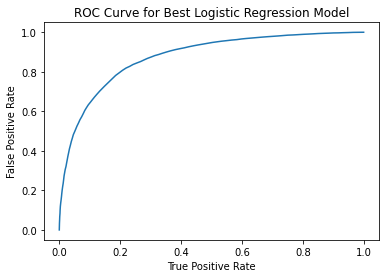

Training set areaUnderROC: 0.8755325136222082


In [ ]:
import matplotlib.pyplot as plt
lrModel = lr_pipe_2.fit(training_df)
trainingSummary = lrModel.stages[-1].summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve for Best Logistic Regression Model')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [ ]:
# your code here
from pyspark.mllib.evaluation import BinaryClassificationMetrics 

y_true = lr_t.select('label')
y_probas = lr_t.select('prediction')
from pyspark.ml.evaluation import BinaryClassificationEvaluator
#Validation data ROC
eval = BinaryClassificationEvaluator(rawPredictionCol='probability', labelCol='label')
ROC = eval.evaluate(lr_t)
results = lr_t.select(['label','probability'])
pred_proba = results.select('probability').rdd.map(lambda row: (float(row['probability'][1])))
#pred_proba.collect()
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, FloatType, ArrayType, LongType

pred_df = spark.createDataFrame(
    pred_proba.zipWithIndex(),
    StructType([
        StructField("prob", FloatType()),
        StructField("id", LongType())
    ])
)
#pred_df.select('prob').isNull()
from pyspark.sql.functions import isnan, when, count, col

pred_df.select([count(when(isnan(c), c)).alias(c) for c in pred_df.columns]).show()
pred_df.describe()
pred_df.count()
from pyspark.sql import functions as F

results = results.withColumn("id", F.monotonically_increasing_id())
results_final = results.join(pred_df, on = 'id',how='left')#, how='right')
results_final.show(5)
results = results_final.drop('id','probability')
results = results.selectExpr("cast(label as int) label",
    "cast(prob as float) prob")
results.select([count(when(isnan(c), c)).alias(c) for c in results.columns]).show()
results = results.na.drop()
results.count()
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
 #DataFrame[text: string, label: int
 #rawPrediction: vector, probability: vector, prediction: double]
## prepare score-label set
results_collect = results.collect()

results_list = [(float(i.label), float(i.prob)) for i in results_collect]

#results_list = [(float(i.label), 1.0-float(i.prob)) for i in results_collect]
#results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
 
metrics = metric(scoreAndLabels)
print("Test Data Aread under ROC score is : ", metrics.areaUnderROC)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]

+----+---+
|prob| id|
+----+---+
|   0|  0|
+----+---+

+----+-----+--------------------+----------+
|  id|label|         probability|      prob|
+----+-----+--------------------+----------+
|  26|    1|[0.45384636281796...|0.54615366|
|  29|    1|[0.43299952574627...|0.56700045|
| 474|    1|[0.25757963713383...| 0.7424204|
| 964|    1|[0.28700145414297...|0.71299857|
|1677|    0|[0.35257929019586...| 0.6474207|
+----+-----+--------------------+----------+
only showing top 5 rows

+-----+----+
|label|prob|
+-----+----+
|    0|   0|
+-----+----+

Test Data Aread under ROC score is :  0.7200955854554987


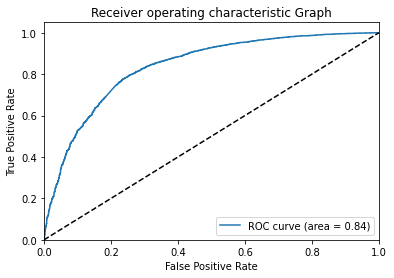

In [ ]:
fpr, tpr, _ = roc_curve(y_score, y_test)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Graph')
plt.legend(loc="lower right")
plt.show()

Your explanation here: Here I provide two methods of deriving ROC AUC curves from our tuned logistic regression model. Recieved Operator Characteristic is a probability curve where the area under the curve is how much better the model does at classification than if we were to purely guess each time. This guess is represented by the diagonal black line and an AUROC score of 0.5 is approximately the same as having a model accuracy of 0%. The higher the AUC score, the better this model is. This essentially represents True Positive vs False Positive Rate (x-axis). TPR is essentially the sensitivity or recall score where FPR is also known as the specificity score of our model. We can start by fitting our pipeline to the training dataframe and then pulling the summary information from our models stages. The training summary includes information on TPR/FPR which can allow us to derive any curve we will need for this assignment. The score of our AUROC was 0.88 which accurately reflects the previous results we were obtaining. The second method I provided included me pulling out the labels and prediction values from our fit data. The prediction column is initially a dense vector so we devise a way to extract the positive classes predictions. Our results column is indexed by an id and out probability dataframe is indexed using the same method. Afterwards, the dataframes are joined and the datatypes are recasted and we drop unnecessary columns. After we are finally able to obtain y_true and y_test in an appropriate format, the ROC curve was calculated and plotted. One major point of issue with this method is that, following the join operation, much of the probability predictions automatically go missing. It was difficult to trace this issue to a root cause but NAs were dropped from this dataframe and the ROC was plotted with the information we had. 




# Creating a Precision Recall Curve
Using the logistic regression summary object contained in the linear regression object within lr_pipe_2, create a precision recall plot. Similar to the `roc` object which is available in the logistic regression summary, there is a `pr` object which can be used to help create a precision / recall curve.  Note that the precision recall curve is built using the same high level methodology as the ROC curve, but using different metrics calculated from the confusion matrix.  If you understand how a ROC curve is built, you understand how a precision / recall curve is built.  Compare and contrast the differences between precision / recall and ROC curves.  What axis is common and what axis is different between the 2 curves?

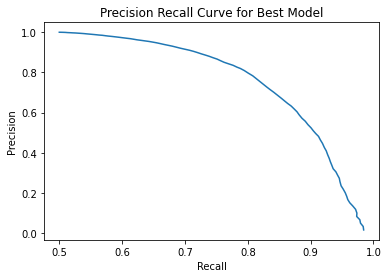

Area under PR Curve: 0.8099


In [ ]:
#fit model to training df
lrModel = lr_pipe_2.fit(training_df)
#obtaining trainingsummary from our models stages
trainingSummary = lrModel.stages[-1].summary
#converting this roc data into a pandas df
roc = trainingSummary.roc.toPandas()
#we know that recall is  equal to TPR and precision is simply TPR / (TPR +FPR)
plt.plot((roc['TPR']/(roc['TPR']+roc['FPR'])),(roc['TPR']))
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision Recall Curve for Best Model')
plt.show()
#the auroc is passed through the evalulator with the testing dataframe and a score of 0.81 is obtained
auroc = evaluator.evaluate(lr_t, {evaluator.metricName: "areaUnderPR"})
print("Area under PR Curve: {:.4f}".format(auroc))

Your explanation here:
While the shape of the curves and scores themselves are relatively comparable, we can see that there is an inverse relationship between the two. Firstly, the X and y-axis are flipped for these charts. Recall is on the x-axis for PR curves and on the y-axis in AUROC curves. Precision corresponds to  TP / (TP + FP) which differs from the x-axis of the AUROC curve which only represents the FPR. FPR can be understood as FP/N.  

In [ ]:
# your code here
from pyspark.mllib.evaluation import BinaryClassificationMetrics 
#this process is extremely similar to the first version of this given that we fit on the training data and transform on testing data from the get go
#not sure if this is different from what you're asking but the following allows us to derive an AUROC curve
lr_test = lr_pipe_2.fit(training_df).transform(testing_df)
#eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='label')
lr_test.select('label','prediction').show(10)

y_true = lr_test.select('label')
y_probas = lr_test.select('prediction')
from pyspark.ml.evaluation import BinaryClassificationEvaluator
#Validation data ROC
eval = BinaryClassificationEvaluator(rawPredictionCol='probability', labelCol='label')
ROC = eval.evaluate(lr_test)
results = lr_test.select(['label','probability'])
pred_proba = results.select('probability').rdd.map(lambda row: (float(row['probability'][1])))
#pred_proba.collect()
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, FloatType, ArrayType, LongType

pred_df = spark.createDataFrame(
    pred_proba.zipWithIndex(),
    StructType([
        StructField("prob", FloatType()),
        StructField("id", LongType())
    ])
)
#pred_df.select('prob').isNull()
from pyspark.sql.functions import isnan, when, count, col

pred_df.select([count(when(isnan(c), c)).alias(c) for c in pred_df.columns]).show()
pred_df.describe()
pred_df.count()
from pyspark.sql import functions as F

results = results.withColumn("id", F.monotonically_increasing_id())
results_final = results.join(pred_df, on = 'id',how='left')#, how='right')
results_final.show(5)
results = results_final.drop('id','probability')
results = results.selectExpr("cast(label as int) label",
    "cast(prob as float) prob")
results.select([count(when(isnan(c), c)).alias(c) for c in results.columns]).show()
results = results.na.drop()
results.count()
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
 #DataFrame[text: string, label: int
 #rawPrediction: vector, probability: vector, prediction: double]
## prepare score-label set
results_collect = results.collect()

results_list = [(float(i.label), float(i.prob)) for i in results_collect]

#results_list = [(float(i.label), 1.0-float(i.prob)) for i in results_collect]
#results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
 
metrics = metric(scoreAndLabels)
print("Test Data Aread under ROC score is : ", metrics.areaUnderROC)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]

+-----+----------+
|label|prediction|
+-----+----------+
|    1|       1.0|
|    1|       1.0|
|    1|       1.0|
|    0|       0.0|
|    1|       0.0|
|    0|       0.0|
|    0|       0.0|
|    1|       1.0|
|    1|       1.0|
|    1|       1.0|
+-----+----------+
only showing top 10 rows

+----+---+
|prob| id|
+----+---+
|   0|  0|
+----+---+

+----+-----+--------------------+----------+
|  id|label|         probability|      prob|
+----+-----+--------------------+----------+
|  26|    1|[0.45384636281796...|0.54615366|
|  29|    1|[0.43299952574627...|0.56700045|
| 474|    1|[0.25757963713383...| 0.7424204|
| 964|    1|[0.28700145414297...|0.71299857|
|1677|    0|[0.35257929019586...| 0.6474207|
+----+-----+--------------------+----------+
only showing top 5 rows

+-----+----+
|label|prob|
+-----+----+
|    0|   0|
+-----+----+

Test Data Aread under ROC score is :  0.7200955854554987


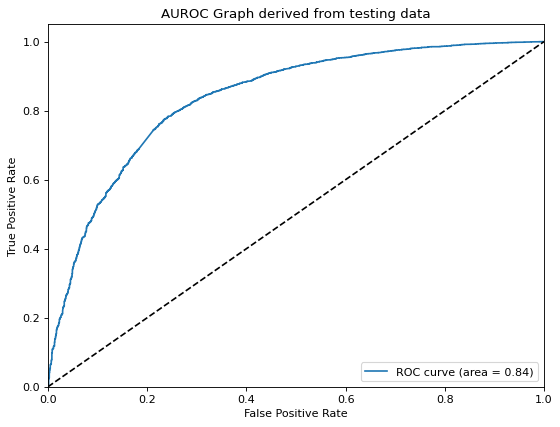

In [ ]:
fpr, tpr, _ = roc_curve(y_score, y_test)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Graph derived from testing data')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


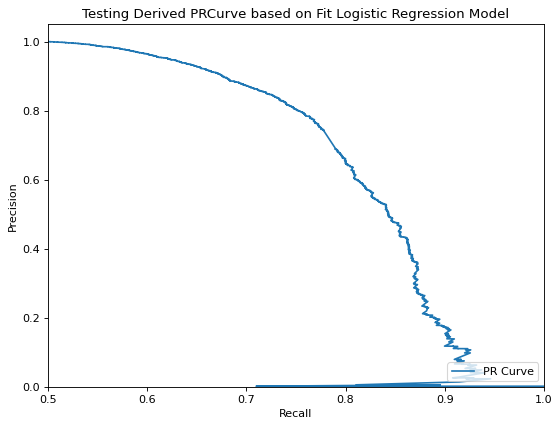

In [ ]:
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.figure()
plt.plot(((tpr)/(tpr + fpr)),tpr,label='PR Curve')
#plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.5, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Testing Derived PRCurve based on Fit Logistic Regression Model')
plt.legend(loc="lower right")
plt.show()